In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url, sep=";")
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [3]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [4]:
for col_name in data.keys():
    print(f"{col_name} has {len(data[col_name].unique())} unique values")

fixed acidity has 96 unique values
volatile acidity has 143 unique values
citric acid has 80 unique values
residual sugar has 91 unique values
chlorides has 153 unique values
free sulfur dioxide has 60 unique values
total sulfur dioxide has 144 unique values
density has 436 unique values
pH has 89 unique values
sulphates has 96 unique values
alcohol has 65 unique values
quality has 6 unique values


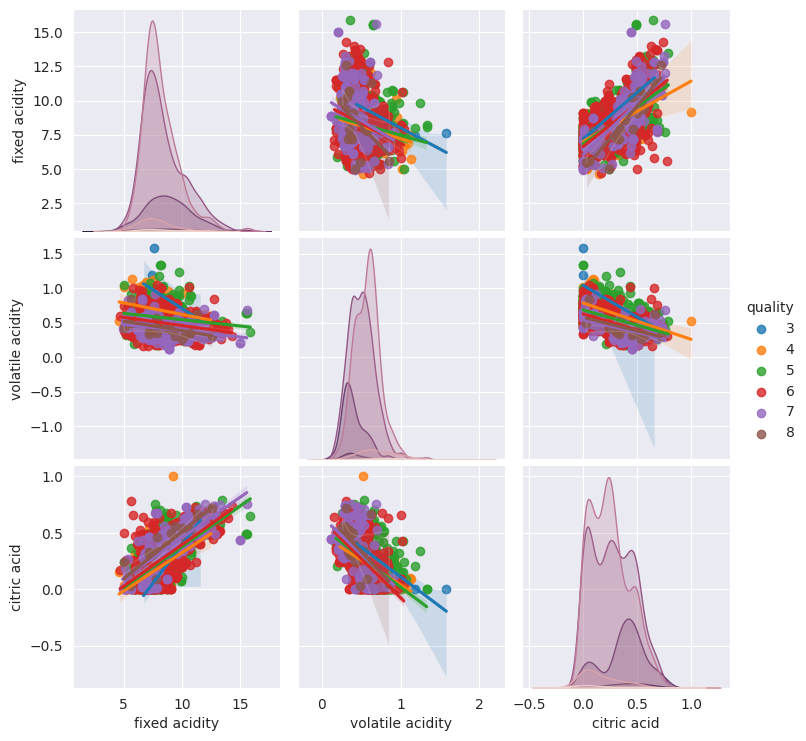

In [5]:
cols_to_plot = ["fixed acidity", "volatile acidity", "citric acid", "quality"]
sns.pairplot(data[cols_to_plot], hue="quality", kind="reg")
plt.show()

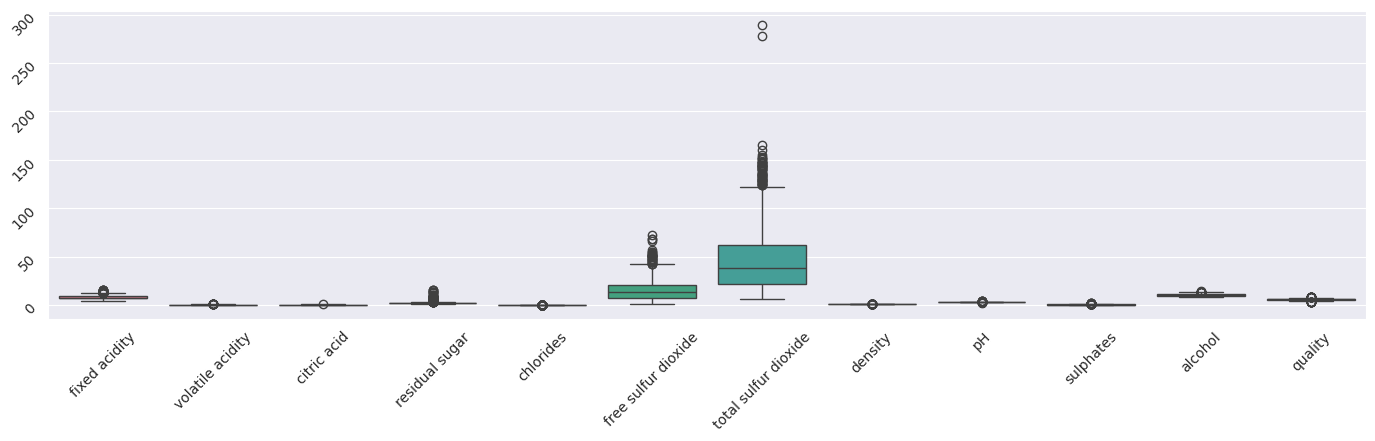

In [6]:
fig, ax = plt.subplots(figsize=(17, 4))
sns.boxplot(data=data)
ax.set_xticks(ax.get_xticks())
ax.tick_params(labelrotation=45)
plt.show()

In [7]:
data = data[data["total sulfur dioxide"] < 200]

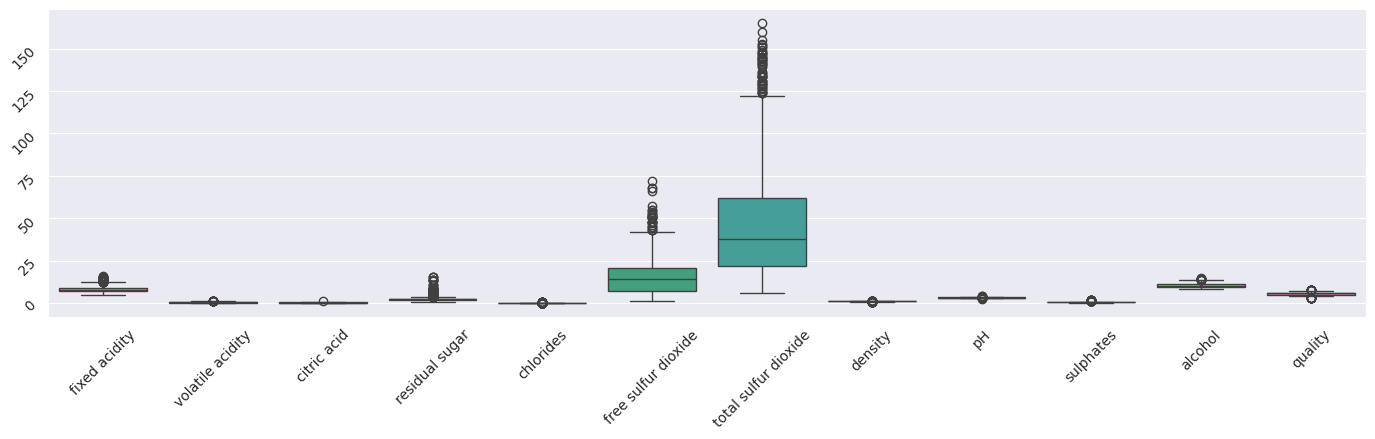

In [8]:
fig, ax = plt.subplots(figsize=(17, 4))
sns.boxplot(data=data)
ax.set_xticks(ax.get_xticks())
ax.tick_params(labelrotation=45)
plt.show()

In [9]:
### z-score all variables except for quality

# find the columns we want to normalize (all except quality)
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop("quality")

# z-score (written out for clarity)
for col in cols2zscore:
    meanval = np.mean(data[col])
    stdev = np.std(data[col], ddof=1)
    data.loc[:, col] = (data[col] - meanval) / stdev

# can also do more compactly
# data[cols2zscore] = data[cols2zscore].apply(stats.zscore)

data.describe()

fixed acidity  volatile acidity   citric acid  residual sugar  \
count   1.597000e+03      1.597000e+03  1.597000e+03    1.597000e+03   
mean    1.779694e-17      1.156801e-16  1.779694e-17   -7.563699e-17   
std     1.000000e+00      1.000000e+00  1.000000e+00    1.000000e+00   
min    -2.135419e+00     -2.280048e+00 -1.391387e+00   -1.168783e+00   
25%    -7.003882e-01     -7.715838e-01 -9.283861e-01   -4.524372e-01   
50%    -2.411785e-01     -4.528645e-02 -5.382836e-02   -2.375335e-01   
75%     5.050372e-01      6.251419e-01  7.692848e-01    4.900487e-02   
max     4.350918e+00      5.876831e+00  3.753070e+00    9.289866e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  1.597000e+03         1.597000e+03          1.597000e+03  1.597000e+03   
mean  -1.512740e-16        -1.779694e-17         -7.118775e-17 -8.357442e-14   
std    1.000000e+00         1.000000e+00          1.000000e+00  1.000000e+00   
min   -1.604073e+00        -1.422392e+00         -1.262186e+00 -3.545821e+00   
25%   -3.720247e-01        -8.476045e-01         -7.594598e-01 -6.109478e-01   
50%   -1.808448e-01        -1.770192e-01         -2.567340e-01 -6.214425e-04   
75%    5.281955e-02         4.935662e-01          4.973546e-01  5.778618e-01   
max    1.112001e+01         5.379259e+00          3.733652e+00  3.682565e+00   

                 pH     sulphates       alcohol      quality  
count  1.597000e+03  1.597000e+03  1.597000e+03  1597.000000  
mean   3.025479e-16  8.008622e-17 -5.872989e-16     5.634314  
std    1.000000e+00  1.000000e+00  1.000000e+00     0.806630  
min   -3.708218e+00 -1.936711e+00 -1.898626e+00     3.000000  
25%   -6.585382e-01 -6.390204e-01 -8.650444e-01     5.000000  
50%   -9.670044e-03 -2.261189e-01 -2.073106e-01     6.000000  
75%    5.743113e-01  4.227263e-01  6.383472e-01     6.000000  
max    4.532407e+00  7.913939e+00  4.208902e+00     8.000000

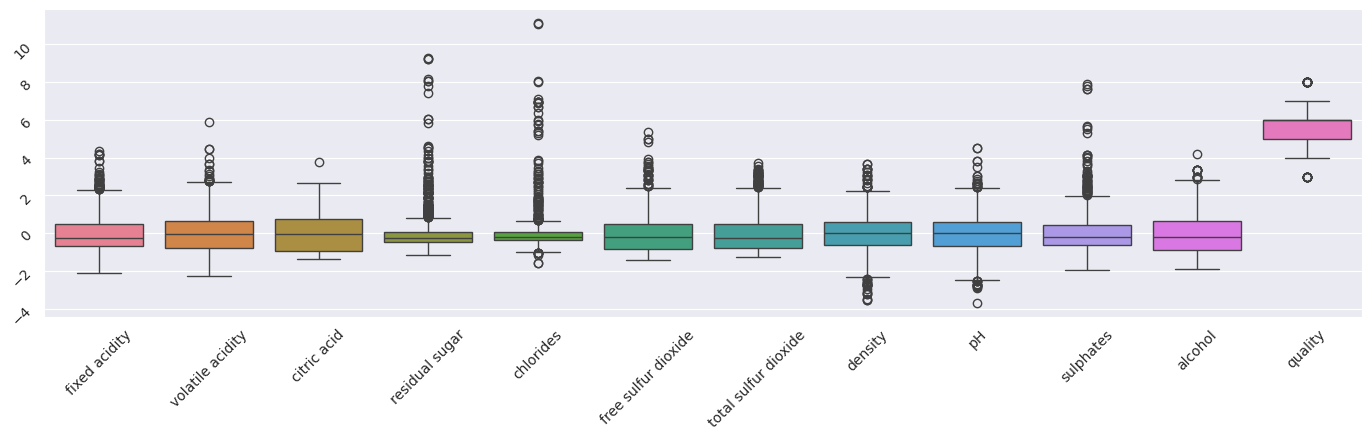

In [10]:
fig, ax = plt.subplots(figsize=(17, 4))
sns.boxplot(data=data)
ax.set_xticks(ax.get_xticks())
ax.tick_params(labelrotation=45)
plt.show()

In [11]:
data["quality"].value_counts()

quality
5    681
6    638
7    197
4     53
8     18
3     10
Name: count, dtype: int64

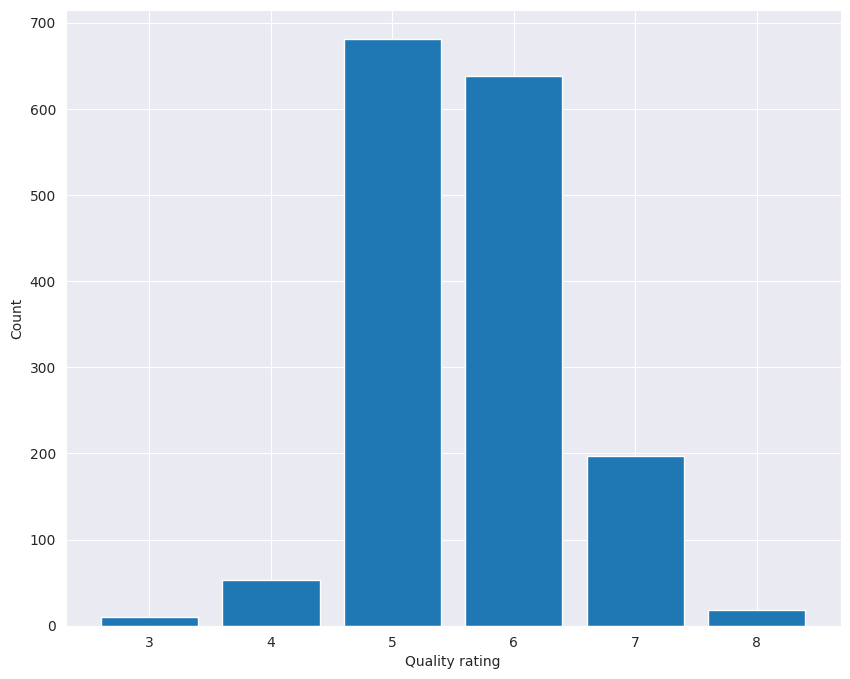

In [12]:
q_counts = data["quality"].value_counts()

fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(q_counts.keys(), q_counts)

ax.set_xlabel("Quality rating")
ax.set_ylabel("Count")

plt.show()

In [13]:
data.loc[data["quality"] > 5]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3          1.653061         -1.386143     1.489509       -0.452437  -0.265814   
7         -0.585586          0.681011    -1.391387       -0.953879  -0.478236   
8         -0.298580          0.289928    -1.288498       -0.380803  -0.308298   
16         0.103229         -1.386143     1.489509       -0.524072   0.095304   
19        -0.241179         -1.162667     1.232286       -0.524072   5.384614   
...             ...               ...          ...             ...        ...   
1592      -1.159598         -0.101155    -0.722608       -0.165899  -0.244571   
1593      -0.872592          0.513404    -0.979831       -0.452437  -0.414509   
1595      -1.389203          0.122321    -0.876942       -0.237533  -0.541962   
1596      -1.159598         -0.101155    -0.722608       -0.165899  -0.244571   
1598      -1.331802         -1.218536     1.026508        0.765351  -0.435751   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
3                0.110375              0.434514  0.662777 -0.982972   
7               -0.081221             -0.790880 -1.141666  0.509424   
8               -0.656009             -0.885141  0.025914  0.314764   
16               1.834737              1.785589  0.078986 -0.074557   
19               0.110375              0.308832  0.078986 -1.761614   
...                   ...                   ...       ...       ...   
1592             1.259949             -0.193893 -0.536647  0.704085   
1593             1.164151             -0.256734 -0.127994  0.704085   
1595             2.217928              0.151731 -0.865693  1.352953   
1596             1.259949             -0.193893 -0.536647  0.704085   
1598             0.206172             -0.131053 -0.669327  0.509424   

      sulphates   alcohol  quality  
3     -0.462063 -0.583159        6  
7     -1.110908 -0.395235        7  
8     -0.521049 -0.865044        7  
16     0.540698  0.074575        7  
19     2.487234 -1.146930        6  
...         ...       ...      ...  
1592   0.540698  0.544385        6  
1593   0.953600 -0.865044        6  
1595   0.599684  0.732309        6  
1596   0.540698  0.544385        6  
1598   0.009825  0.544385        6  

[853 rows x 12 columns]

In [14]:
data.insert(len(data.columns), "boolQuality", 0)
data.loc[data["quality"] > 5, "boolQuality"] = 1

In [15]:
data.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528185          0.960356    -1.391387       -0.452437  -0.244571   
1      -0.298580          1.965999    -1.391387        0.049005   0.222757   
2      -0.298580          1.295570    -1.185609       -0.165899   0.095304   
3       1.653061         -1.386143     1.489509       -0.452437  -0.265814   
4      -0.528185          0.960356    -1.391387       -0.452437  -0.244571   
5      -0.528185          0.736880    -1.391387       -0.524072  -0.265814   
6      -0.241179          0.401666    -1.082720       -0.667341  -0.393267   
7      -0.585586          0.681011    -1.391387       -0.953879  -0.478236   
8      -0.298580          0.289928    -1.288498       -0.380803  -0.308298   
9      -0.470783         -0.157025     0.460617        2.556215  -0.350782   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.464413             -0.382415  0.556633  1.288066  -0.580034   
1             0.876758              0.654456  0.025914 -0.723425   0.127797   
2            -0.081221              0.245992  0.132058 -0.334104  -0.049161   
3             0.110375              0.434514  0.662777 -0.982972  -0.462063   
4            -0.464413             -0.382415  0.556633  1.288066  -0.580034   
5            -0.272817             -0.193893  0.556633  1.288066  -0.580034   
6            -0.081221              0.403094 -0.186373 -0.074557  -1.169894   
7            -0.081221             -0.790880 -1.141666  0.509424  -1.110908   
8            -0.656009             -0.885141  0.025914  0.314764  -0.521049   
9             0.110375              1.754169  0.556633  0.249877   0.835628   

    alcohol  quality  boolQuality  
0 -0.959006        5            0  
1 -0.583159        5            0  
2 -0.583159        5            0  
3 -0.583159        6            1  
4 -0.959006        5            0  
5 -0.959006        5            0  
6 -0.959006        5            0  
7 -0.395235        7            1  
8 -0.865044        7            1  
9  0.074575        5            0

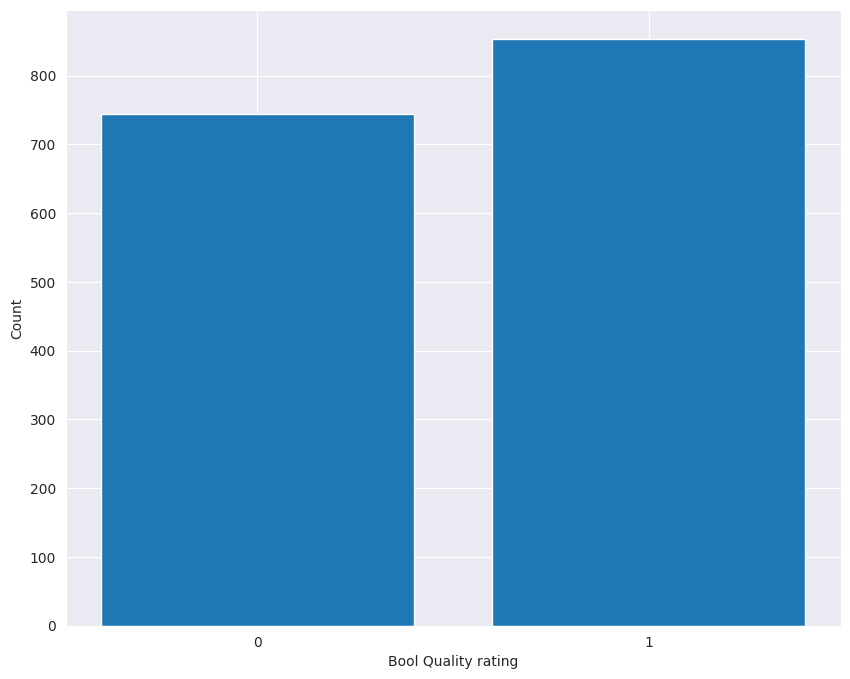

In [16]:
bool_q_counts = data["boolQuality"].value_counts()

fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(bool_q_counts.keys(), bool_q_counts)

ax.set_xlabel("Bool Quality rating")
ax.set_ylabel("Count")
ax.set_xticks(bool_q_counts.keys())

plt.show()

In [17]:
data_tensor = torch.from_numpy(data[cols2zscore].values).float()
labels_tensor = torch.from_numpy(data["boolQuality"].values).float()

print(f"{data_tensor.shape}")
print(f"{labels_tensor.shape}")

# in pytorch, labels need to be organized as a multidimensional tensor
labels_tensor = labels_tensor.unsqueeze(1)
print(f"{labels_tensor.shape}")

torch.Size([1597, 11])
torch.Size([1597])
torch.Size([1597, 1])


In [18]:
data_train, data_test, labels_train, labels_test = train_test_split(
    data_tensor, labels_tensor, test_size=0.1
)

# then convert them into PyTorch Datasets (note: already converted to tensors)
train_dataset = TensorDataset(data_train, labels_train)
test_dataset = TensorDataset(data_test, labels_test)

batch_size = 64
train_dataloader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, drop_last=True
)
test_dataloader = DataLoader(test_dataset, batch_size=len(test_dataset))

for X, y in train_dataloader:
    print(X.shape, y.shape)

print("/-------------------TEST BATCH---------------------------------------------/")
for X, y in test_dataloader:
    print(X.shape, y.shape)

torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
/-------------------TEST BATCH---------------------------------------------/
torch.Size([160, 11])

In [19]:
class WineQualityModel(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.layer_stack = nn.Sequential(
            nn.Linear(11, 16), nn.ReLU(), nn.Linear(16, 16), nn.ReLU(), nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [20]:
def train_the_model_on_batch_size(
    model, train_dataset, test_dataset, epoch, batch_size
):
    train_dataloader = DataLoader(
        train_dataset, batch_size=batch_size, shuffle=True, drop_last=True
    )
    test_dataloader = DataLoader(test_dataset, batch_size=len(test_dataset))

    train_accuracies = np.zeros(epoch)
    test_accuracies = np.zeros(epoch)

    loss_fn = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

    for epi in range(epoch):
        batch_accuracies = np.zeros(len(train_dataloader))
        model.train()
        for bi, (X, y) in enumerate(train_dataloader):
            y_hat = model(X)
            loss = loss_fn(y_hat, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_accuracies[bi] = 100 * torch.mean(((y_hat > 0) == y).float()).item()
        train_accuracies[epi] = np.mean(batch_accuracies)

        test_accuracy = 0

        model.eval()
        with torch.inference_mode():
            for X_test, y_test in test_dataloader:
                y_pred = model(X_test)
                test_accuracy = (
                    100 * torch.mean(((y_pred > 0) == y_test).float()).item()
                )

        test_accuracies[epi] = test_accuracy

    return train_accuracies, test_accuracies

In [21]:
wine_ann = WineQualityModel()

epoch = 100
train_acc_matrix = np.zeros((epoch, len(range(1, 10))))
test_acc_matrix = np.zeros((epoch, len(range(1, 10))))

for bi, batch_size in enumerate(range(1, 10)):
    train_acc, test_acc = train_the_model_on_batch_size(
        wine_ann,
        train_dataset=train_dataset,
        test_dataset=test_dataset,
        epoch=epoch,
        batch_size=2**batch_size,
    )

    train_acc_matrix[:, bi] = train_acc
    test_acc_matrix[:, bi] = test_acc

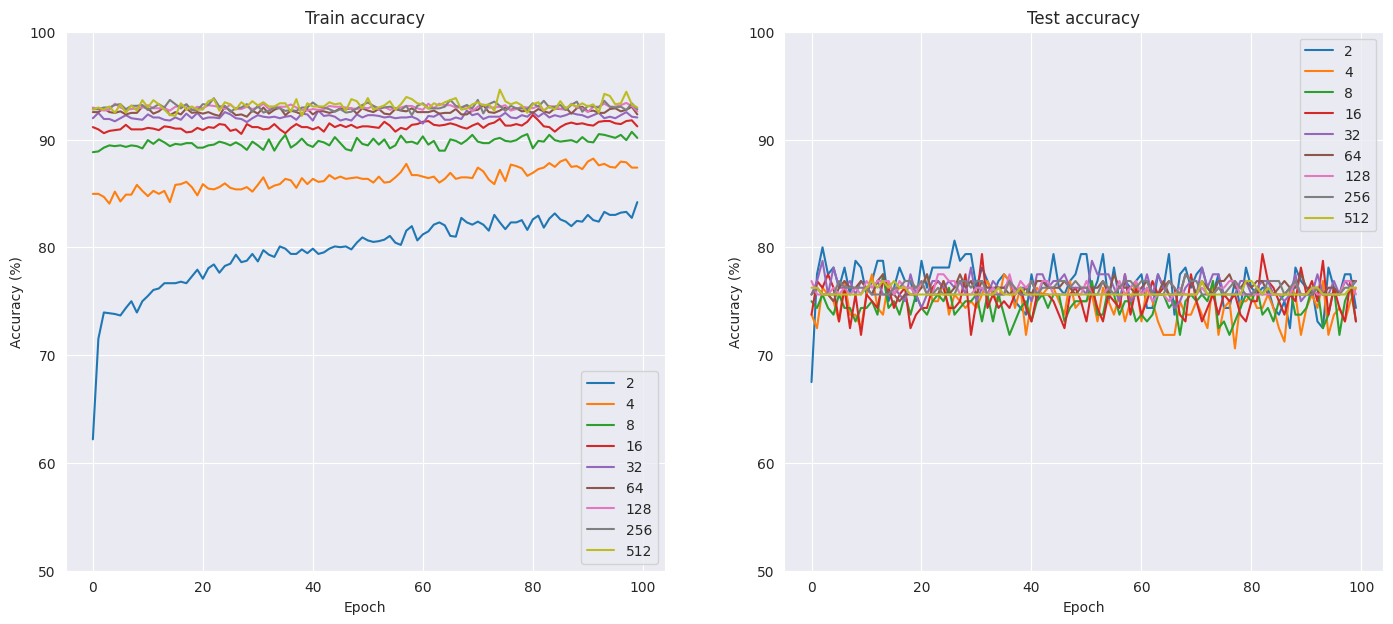

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(17, 7))

ax[0].plot(train_acc_matrix)
ax[0].set_title("Train accuracy")
ax[1].plot(test_acc_matrix)
ax[1].set_title("Test accuracy")

# common features
for i in range(2):
    ax[i].legend(2 ** np.arange(1, 10))
    ax[i].set_xlabel("Epoch")
    ax[i].set_ylabel("Accuracy (%)")
    ax[i].set_ylim([50, 100])
    ax[i].grid(True)

plt.show()

In [23]:
class WineQualityClassifierWithBatchNorm(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.input = nn.Linear(11, 16)

        self.bn1 = nn.BatchNorm1d(16)
        self.fc1 = nn.Linear(16, 16)

        self.bn2 = nn.BatchNorm1d(16)
        self.fc2 = nn.Linear(16, 16)

        self.output = nn.Linear(16, 1)

    def forward(self, x, do_batch_norm: bool = True):
        x = nn.functional.relu(self.input(x))

        if do_batch_norm:
            x = self.bn1(x)
            x = self.fc1(x)
            x = nn.functional.relu(x)

            x = self.bn2(x)
            x = self.fc2(x)
            x = nn.functional.relu(x)
        else:
            x = self.fc1(x)
            x = nn.functional.relu(x)
            x = self.fc2(x)
            x = nn.functional.relu(x)

        return self.output(x)

In [24]:
def train_the_model_with_batchnorm(
    model, train_dataloader, test_dataloader, do_batchnorm, epoch
):
    train_accuracies = np.zeros(epoch)
    test_accuracies = np.zeros(epoch)

    loss_fn = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

    for epi in range(epoch):
        batch_accuracies = np.zeros(len(train_dataloader))
        model.train()
        for bi, (X, y) in enumerate(train_dataloader):
            y_hat = model(X, do_batchnorm)
            loss = loss_fn(y_hat, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_accuracies[bi] = 100 * torch.mean(((y_hat > 0) == y).float()).item()
        train_accuracies[epi] = np.mean(batch_accuracies)

        test_accuracy = 0

        model.eval()
        with torch.inference_mode():
            for X_test, y_test in test_dataloader:
                y_pred = model(X_test)
                test_accuracy = (
                    100 * torch.mean(((y_pred > 0) == y_test).float()).item()
                )

        test_accuracies[epi] = test_accuracy

    return train_accuracies, test_accuracies

In [25]:
wine_quality_w_bn = WineQualityClassifierWithBatchNorm()
wine_quality_wo_bn = WineQualityClassifierWithBatchNorm()

epochs = 1000

train_acc_w_bn, test_acc_w_bn = train_the_model_with_batchnorm(
    wine_quality_w_bn, train_dataloader, test_dataloader, True, epochs
)
train_acc_wo_bn, test_acc_wo_bn = train_the_model_with_batchnorm(
    wine_quality_wo_bn, train_dataloader, test_dataloader, False, epochs
)

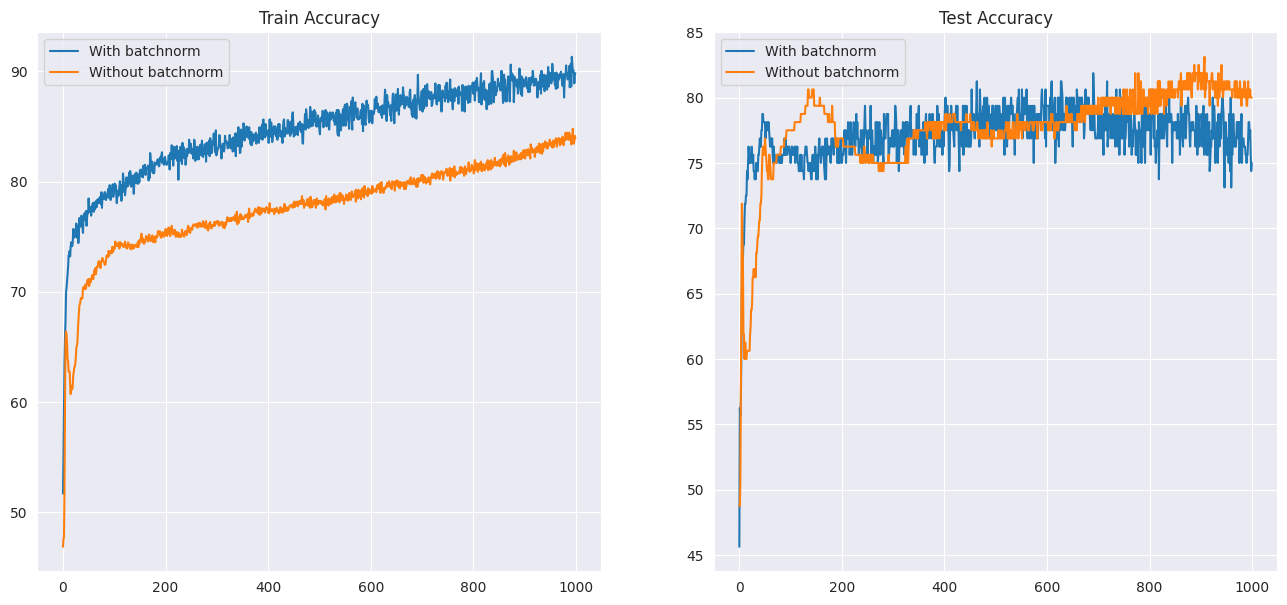

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
ax1.plot(train_acc_w_bn, label="With batchnorm")
ax1.plot(train_acc_wo_bn, label="Without batchnorm")
ax1.set_title("Train Accuracy")

ax2.plot(test_acc_w_bn, label="With batchnorm")
ax2.plot(test_acc_wo_bn, label="Without batchnorm")
ax2.set_title("Test Accuracy")

for ax in ax1, ax2:
    ax.legend()
    ax.grid(True)

plt.show()

# Plotting the output of different activation functions

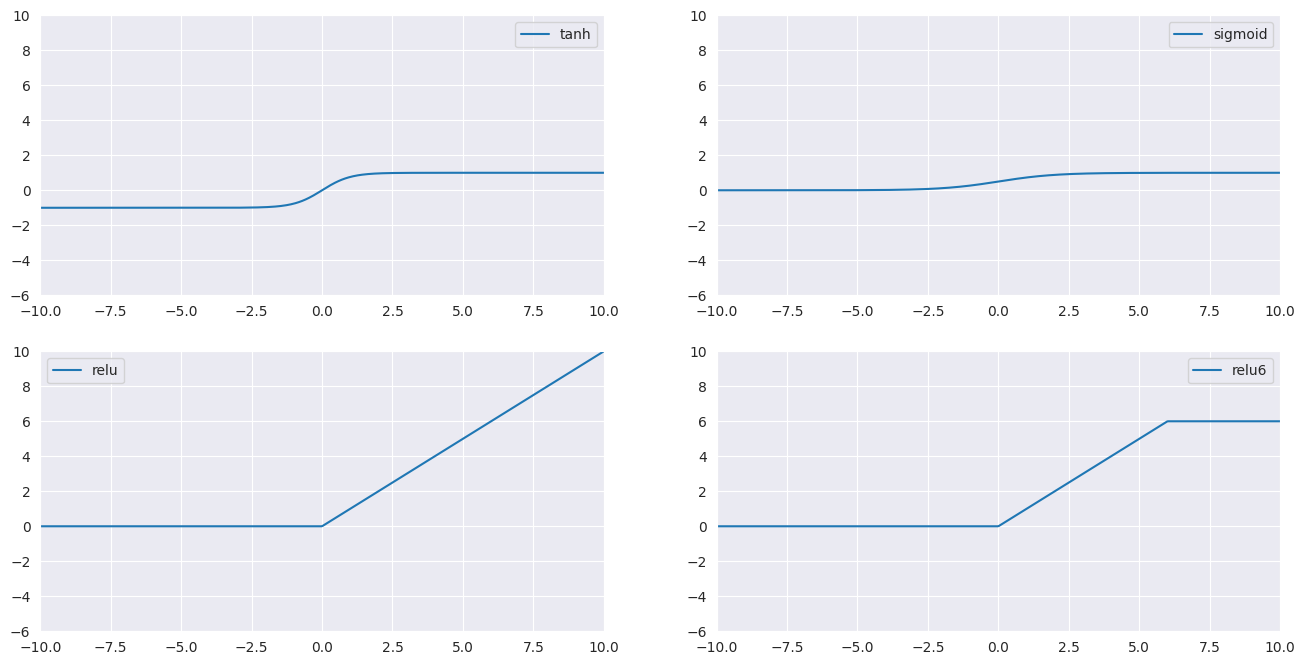

In [27]:
input_tensor = torch.linspace(-10, 10, 500)


def get_activation_func(attribute: str):
    return getattr(torch.nn.functional, attribute)


func_names = ["tanh", "sigmoid", "relu", "relu6"]

nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 8))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        idx = i * ncols + j
        activation_func = get_activation_func(func_names[idx])
        output_tensor = activation_func(input_tensor)
        col.plot(input_tensor, output_tensor, label=func_names[idx])
        col.set_xlim(-10, 10)
        col.set_ylim(-6, 10)
        col.legend()
plt.show()

torch.Size([100]) torch.Size([100])


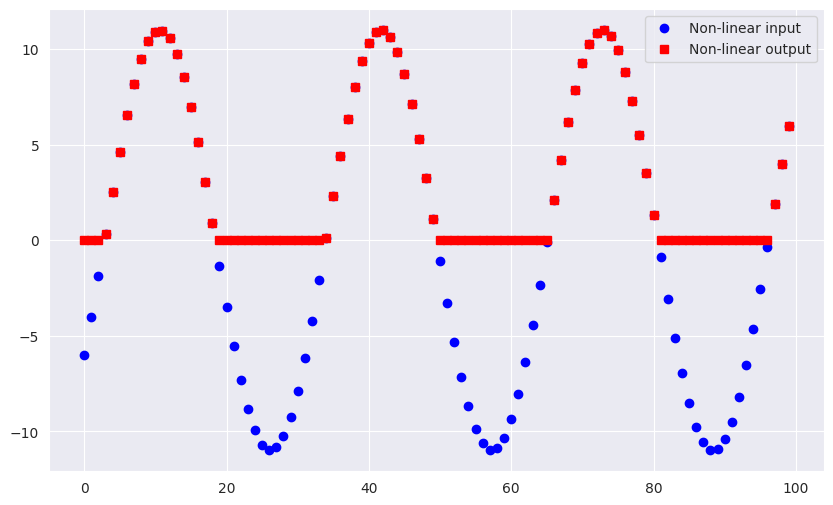

In [28]:
nonlin = torch.sin(torch.linspace(-10, 10, 100))
nonlin2 = nonlin * 2
print(nonlin.shape, nonlin2.shape)

w1 = 3
w2 = -7
input_tensor = nonlin * w1 + nonlin2 * w2

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(input_tensor, "bo", label="Non-linear input")
ax.plot(nn.functional.relu(input_tensor), "rs", label="Non-linear output")
ax.legend()
plt.show()

# Visualize accuracy with different variants of relu

In [29]:
class WineQualityClassifierDifferentRelu(nn.Module):
    def __init__(self, relu_variant: str, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.input = nn.Linear(11, 16)
        self.hidden1 = nn.Linear(16, 16)
        self.hidden2 = nn.Linear(16, 16)
        self.output = nn.Linear(16, 1)
        self.act_func = getattr(nn, relu_variant)()

    def forward(self, x):
        x = self.act_func(self.input(x))
        x = self.act_func(self.hidden1(x))
        x = self.act_func(self.hidden2(x))
        x = self.output(x)
        return x

In [30]:
def train_the_model_with_act_func(act_func_name: str, epochs):
    wq_clf = WineQualityClassifierDifferentRelu(act_func_name)
    loss_fn = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(wq_clf.parameters(), lr=0.01)

    epochs = epochs
    train_acc = np.zeros(epochs)
    test_acc = np.zeros(epochs)
    for epi in range(epochs):
        batch_acc = np.zeros(len(train_dataloader))
        test_batch_acc = np.zeros(len(test_dataloader))
        for i, (X, y) in enumerate(train_dataloader):
            wq_clf.train()
            y_hat = wq_clf(X)

            loss = loss_fn(y_hat, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_acc[i] = 100 * torch.mean(((y_hat > 0) == y).float()).item()

        wq_clf.eval()
        with torch.inference_mode():
            for i, (X_test, y_test) in enumerate(test_dataloader):
                y_pred = wq_clf(X_test)
                test_batch_acc[i] = (
                    100 * torch.mean(((y_pred > 0) == y_test).float()).item()
                )

        train_acc[epi] = np.mean(batch_acc)
        test_acc[epi] = np.mean(test_batch_acc)

    return train_acc, test_acc

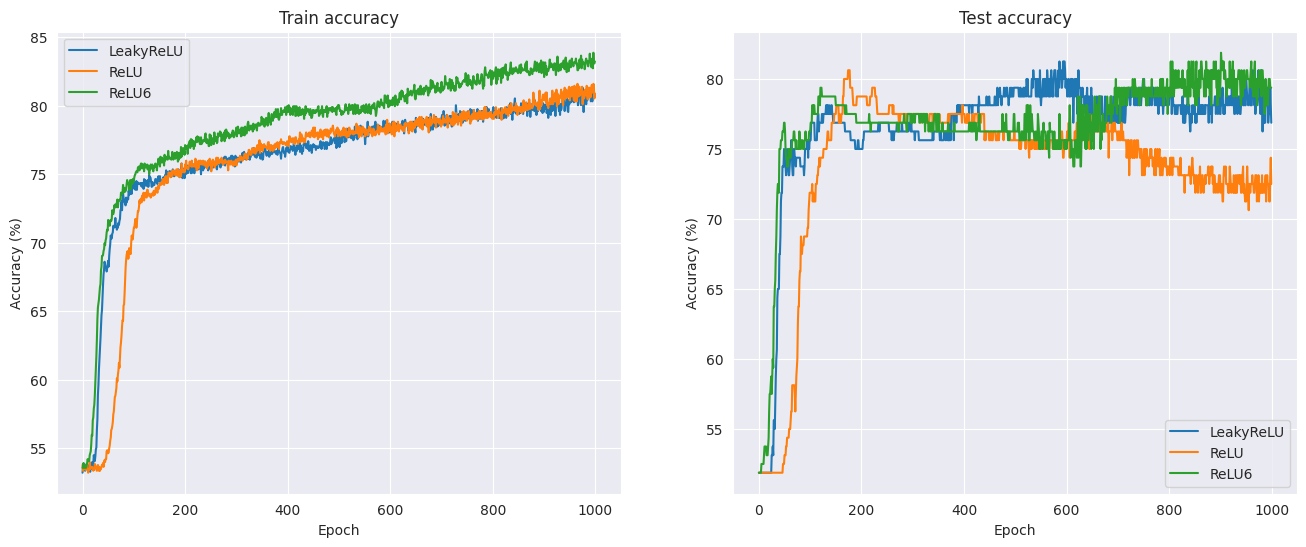

In [31]:
act_func_names = ["LeakyReLU", "ReLU", "ReLU6"]
train_act_func = np.zeros((epochs, len(act_func_names)))
test_act_func = np.zeros((epochs, len(act_func_names)))

for i, name in enumerate(act_func_names):
    train_acc, test_acc = train_the_model_with_act_func(name, epochs=1000)
    train_act_func[:, i] = train_acc
    test_act_func[:, i] = test_acc

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(train_act_func, label=act_func_names)
ax[0].set_title("Train accuracy")
ax[1].plot(test_act_func, label=act_func_names)
ax[1].set_title("Test accuracy")

for i in range(2):
    ax[i].legend()
    ax[i].set_xlabel("Epoch")
    ax[i].set_ylabel("Accuracy (%)")

plt.show()

# Predict the sugary level in the wine dataset

In [32]:
data.describe()

fixed acidity  volatile acidity   citric acid  residual sugar  \
count   1.597000e+03      1.597000e+03  1.597000e+03    1.597000e+03   
mean    1.779694e-17      1.156801e-16  1.779694e-17   -7.563699e-17   
std     1.000000e+00      1.000000e+00  1.000000e+00    1.000000e+00   
min    -2.135419e+00     -2.280048e+00 -1.391387e+00   -1.168783e+00   
25%    -7.003882e-01     -7.715838e-01 -9.283861e-01   -4.524372e-01   
50%    -2.411785e-01     -4.528645e-02 -5.382836e-02   -2.375335e-01   
75%     5.050372e-01      6.251419e-01  7.692848e-01    4.900487e-02   
max     4.350918e+00      5.876831e+00  3.753070e+00    9.289866e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  1.597000e+03         1.597000e+03          1.597000e+03  1.597000e+03   
mean  -1.512740e-16        -1.779694e-17         -7.118775e-17 -8.357442e-14   
std    1.000000e+00         1.000000e+00          1.000000e+00  1.000000e+00   
min   -1.604073e+00        -1.422392e+00         -1.262186e+00 -3.545821e+00   
25%   -3.720247e-01        -8.476045e-01         -7.594598e-01 -6.109478e-01   
50%   -1.808448e-01        -1.770192e-01         -2.567340e-01 -6.214425e-04   
75%    5.281955e-02         4.935662e-01          4.973546e-01  5.778618e-01   
max    1.112001e+01         5.379259e+00          3.733652e+00  3.682565e+00   

                 pH     sulphates       alcohol      quality  boolQuality  
count  1.597000e+03  1.597000e+03  1.597000e+03  1597.000000  1597.000000  
mean   3.025479e-16  8.008622e-17 -5.872989e-16     5.634314     0.534126  
std    1.000000e+00  1.000000e+00  1.000000e+00     0.806630     0.498990  
min   -3.708218e+00 -1.936711e+00 -1.898626e+00     3.000000     0.000000  
25%   -6.585382e-01 -6.390204e-01 -8.650444e-01     5.000000     0.000000  
50%   -9.670044e-03 -2.261189e-01 -2.073106e-01     6.000000     1.000000  
75%    5.743113e-01  4.227263e-01  6.383472e-01     6.000000     1.000000  
max    4.532407e+00  7.913939e+00  4.208902e+00     8.000000     1.000000

In [33]:
data.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528185          0.960356    -1.391387       -0.452437  -0.244571   
1      -0.298580          1.965999    -1.391387        0.049005   0.222757   
2      -0.298580          1.295570    -1.185609       -0.165899   0.095304   
3       1.653061         -1.386143     1.489509       -0.452437  -0.265814   
4      -0.528185          0.960356    -1.391387       -0.452437  -0.244571   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.464413             -0.382415  0.556633  1.288066  -0.580034   
1             0.876758              0.654456  0.025914 -0.723425   0.127797   
2            -0.081221              0.245992  0.132058 -0.334104  -0.049161   
3             0.110375              0.434514  0.662777 -0.982972  -0.462063   
4            -0.464413             -0.382415  0.556633  1.288066  -0.580034   

    alcohol  quality  boolQuality  
0 -0.959006        5            0  
1 -0.583159        5            0  
2 -0.583159        5            0  
3 -0.583159        6            1  
4 -0.959006        5            0

In [34]:
data.drop(["residual sugar", "quality"], axis=1)

fixed acidity  volatile acidity  citric acid  chlorides  \
0         -0.528185          0.960356    -1.391387  -0.244571   
1         -0.298580          1.965999    -1.391387   0.222757   
2         -0.298580          1.295570    -1.185609   0.095304   
3          1.653061         -1.386143     1.489509  -0.265814   
4         -0.528185          0.960356    -1.391387  -0.244571   
...             ...               ...          ...        ...   
1594      -1.216999          0.401666    -0.979831   0.052820   
1595      -1.389203          0.122321    -0.876942  -0.541962   
1596      -1.159598         -0.101155    -0.722608  -0.244571   
1597      -1.389203          0.653076    -0.774052  -0.265814   
1598      -1.331802         -1.218536     1.026508  -0.435751   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.464413             -0.382415  0.556633  1.288066   
1                0.876758              0.654456  0.025914 -0.723425   
2               -0.081221              0.245992  0.132058 -0.334104   
3                0.110375              0.434514  0.662777 -0.982972   
4               -0.464413             -0.382415  0.556633  1.288066   
...                   ...                   ...       ...       ...   
1594             1.547343             -0.068212 -0.982451  0.898745   
1595             2.217928              0.151731 -0.865693  1.352953   
1596             1.259949             -0.193893 -0.536647  0.704085   
1597             1.547343             -0.068212 -0.679941  1.677387   
1598             0.206172             -0.131053 -0.669327  0.509424   

      sulphates   alcohol  boolQuality  
0     -0.580034 -0.959006            0  
1      0.127797 -0.583159            0  
2     -0.049161 -0.583159            0  
3     -0.462063 -0.583159            1  
4     -0.580034 -0.959006            0  
...         ...       ...          ...  
1594  -0.462063  0.074575            0  
1595   0.599684  0.732309            1  
1596   0.540698  0.544385            1  
1597   0.304754 -0.207311            0  
1598   0.009825  0.544385            1  

[1597 rows x 11 columns]

In [35]:
labels = data["residual sugar"]
features = data.drop(["residual sugar", "quality"], axis=1)
print(labels.shape, features.shape)

(1597,) (1597, 11)


In [36]:
print(labels.info())
print("==================================")
print(features.info())

<class 'pandas.core.series.Series'>
Index: 1597 entries, 0 to 1598
Series name: residual sugar
Non-Null Count  Dtype  
--------------  -----  
1597 non-null   float64
dtypes: float64(1)
memory usage: 25.0 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 1597 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1597 non-null   float64
 1   volatile acidity      1597 non-null   float64
 2   citric acid           1597 non-null   float64
 3   chlorides             1597 non-null   float64
 4   free sulfur dioxide   1597 non-null   float64
 5   total sulfur dioxide  1597 non-null   float64
 6   density               1597 non-null   float64
 7   pH                    1597 non-null   float64
 8   sulphates             1597 non-null   float64
 9   alcohol               1597 non-null   float64
 10  boolQuality           1597 non-null   int64  
dtypes: float64(10), i

In [37]:
labels_array = labels.to_numpy()
features_array = features.to_numpy()
print(labels_array[:10])
print("=========================")
print(features_array[:10])

[-0.45243719  0.04900487 -0.16589887 -0.45243719 -0.45243719 -0.52407177
 -0.66734093 -0.95387925 -0.38080261  2.55621518]
[[-0.52818461  0.9603561  -1.39138728 -0.2445714  -0.46441288 -0.38241548
   0.55663304  1.28806618 -0.58003447 -0.95900641  0.        ]
 [-0.29857976  1.96599865 -1.39138728  0.22275723  0.87675777  0.65445638
   0.02591449 -0.72342497  0.12779669 -0.5831585   0.        ]
 [-0.29857976  1.29557028 -1.18560899  0.09530397 -0.08122127  0.24599171
   0.1320582  -0.3341041  -0.0491611  -0.5831585   0.        ]
 [ 1.65306147 -1.38614318  1.48950887 -0.26581361  0.11037454  0.43451386
   0.66277675 -0.98297221 -0.46206261 -0.5831585   1.        ]
 [-0.52818461  0.9603561  -1.39138728 -0.2445714  -0.46441288 -0.38241548
   0.55663304  1.28806618 -0.58003447 -0.95900641  0.        ]
 [-0.52818461  0.73687998 -1.39138728 -0.26581361 -0.27281707 -0.19389333
   0.55663304  1.28806618 -0.58003447 -0.95900641  0.        ]
 [-0.24117854  0.4016658  -1.08271984 -0.39326688 -0.08

In [38]:
device = "gpu" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [39]:
train_features, test_features, train_labels, test_labels = train_test_split(
    features_array, labels_array, test_size=0.1
)

train_features_tensor = torch.from_numpy(train_features).float().to(device)
test_features_tensor = torch.from_numpy(test_features).float().to(device)
train_labels_tensor = torch.from_numpy(train_labels).float().unsqueeze(1).to(device)
test_labels_tensor = torch.from_numpy(test_labels).float().unsqueeze(1).to(device)

train_dataset = TensorDataset(train_features_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_features_tensor, test_labels_tensor)

batch_size = 32
train_dataloader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, drop_last=True
)
test_dataloader = DataLoader(test_dataset)

In [40]:
X, y = next(iter(train_dataloader))
print(X.shape)
print(y.shape)

torch.Size([32, 11])
torch.Size([32, 1])


In [41]:
next(iter(train_dataloader))[0].device

device(type='cpu')

In [42]:
train_dataset[0]

(tensor([-0.0690,  2.6364, -0.9284, -0.4782, -0.8476, -0.2882,  0.0525,  0.0552,
         -0.6390, -1.3349,  1.0000]),
 tensor([-0.1659]))

In [43]:
class SugaryLevelRegressionModel(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.input = nn.Linear(11, 16)
        self.bn1 = nn.BatchNorm1d(16)
        self.hd1 = nn.Linear(16, 32)

        self.bn2 = nn.BatchNorm1d(32)
        self.hd2 = nn.Linear(32, 32)

        self.output = nn.Linear(32, 1)
        self.act_func = nn.ReLU()

    def forward(self, x):
        x = self.act_func(self.input(x))
        # print(f'Shape after input layer: {x.shape}')
        x = self.act_func(self.hd1(self.bn1(x)))
        # print(f'Shape after first hidden layer: {x.shape}')
        x = self.act_func(self.hd2(self.bn2(x)))
        # print(f'Shape after second hidden layer: {x.shape}')
        x = self.output(x)
        return x

In [44]:
exbn = nn.BatchNorm1d(16)
randn_t = torch.randn((2, 16))
exbn(randn_t)

tensor([[ 1.0000, -1.0000, -1.0000, -1.0000,  1.0000,  1.0000, -1.0000, -0.9999,
          1.0000, -0.9999, -0.9999,  1.0000, -1.0000,  1.0000,  1.0000,  0.9993],
        [-1.0000,  1.0000,  1.0000,  1.0000, -1.0000, -1.0000,  1.0000,  0.9999,
         -1.0000,  0.9999,  0.9999, -1.0000,  1.0000, -1.0000, -1.0000, -0.9993]],
       grad_fn=<NativeBatchNormBackward0>)

In [45]:
sg_rg_model = SugaryLevelRegressionModel().to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(sg_rg_model.parameters(), lr=0.01)
epochs = 500

train_loss = np.zeros(epochs)
test_loss = np.zeros(epochs)
for epi in range(epochs):
    train_batch_loss = np.zeros(len(train_dataloader))
    test_batch_loss = np.zeros(len(test_dataloader))
    for i, (X, y) in enumerate(train_dataloader):
        sg_rg_model.train()
        y_hat = sg_rg_model(X)

        loss = loss_fn(y_hat, y)
        print(y_hat.shape, y.shape)
        print(loss)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_batch_loss[i] = loss.detach()

    sg_rg_model.eval()
    with torch.inference_mode():
        for i, (X_test, y_test) in enumerate(test_dataloader):
            y_pred = sg_rg_model(X_test)
            pred_loss = loss_fn(y_pred, y_test)

            test_batch_loss[i] = pred_loss.detach()

    train_loss[epi] = np.mean(train_batch_loss)
    test_loss[epi] = np.mean(test_batch_loss)

torch.Size([32, 1]) torch.Size([32, 1])
tensor(2.8688, grad_fn=<MseLossBackward0>)
torch.Size([32, 1]) torch.Size([32, 1])
tensor(2.6198, grad_fn=<MseLossBackward0>)
torch.Size([32, 1]) torch.Size([32, 1])
tensor(0.3713, grad_fn=<MseLossBackward0>)
torch.Size([32, 1]) torch.Size([32, 1])
tensor(0.2137, grad_fn=<MseLossBackward0>)
torch.Size([32, 1]) torch.Size([32, 1])
tensor(0.8283, grad_fn=<MseLossBackward0>)
torch.Size([32, 1]) torch.Size([32, 1])
tensor(0.5282, grad_fn=<MseLossBackward0>)
torch.Size([32, 1]) torch.Size([32, 1])
tensor(2.3059, grad_fn=<MseLossBackward0>)
torch.Size([32, 1]) torch.Size([32, 1])
tensor(0.5878, grad_fn=<MseLossBackward0>)
torch.Size([32, 1]) torch.Size([32, 1])
tensor(1.4650, grad_fn=<MseLossBackward0>)
torch.Size([32, 1]) torch.Size([32, 1])
tensor(0.4795, grad_fn=<MseLossBackward0>)
torch.Size([32, 1]) torch.Size([32, 1])
tensor(0.2202, grad_fn=<MseLossBackward0>)
torch.Size([32, 1]) torch.Size([32, 1])
tensor(1.9850, grad_fn=<MseLossBackward0>)
torc

In [46]:
print(train_loss.shape)
print(test_loss.shape)

(500,)
(500,)


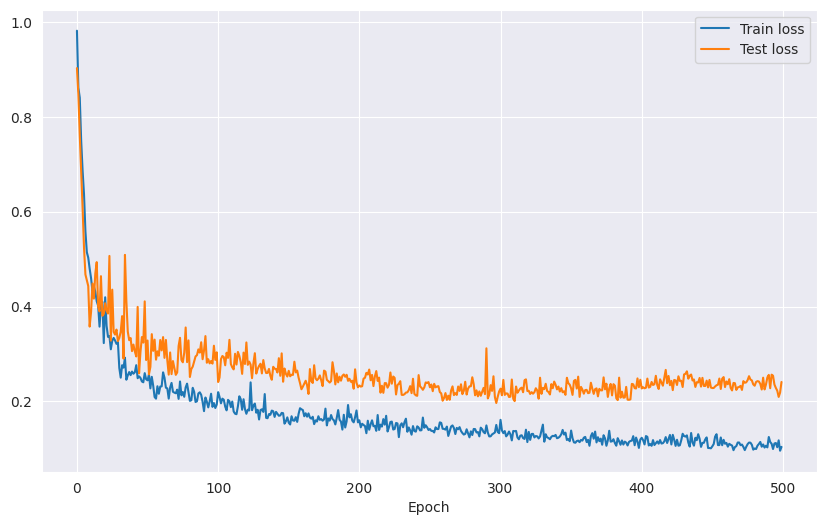

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(train_loss, label="Train loss")
ax.plot(test_loss, label="Test loss")
ax.set_xlabel("Epoch")
ax.legend()
plt.show()

# Plot the loss of different loss functions
We will see how MSE and BCE work by drawing the loss

## MSE loss function

tensor(0.5000) torch.Size([])
tensor([-2.0000e+00, -1.9600e+00, -1.9200e+00, -1.8800e+00, -1.8400e+00,
        -1.8000e+00, -1.7600e+00, -1.7200e+00, -1.6800e+00, -1.6400e+00,
        -1.6000e+00, -1.5600e+00, -1.5200e+00, -1.4800e+00, -1.4400e+00,
        -1.4000e+00, -1.3600e+00, -1.3200e+00, -1.2800e+00, -1.2400e+00,
        -1.2000e+00, -1.1600e+00, -1.1200e+00, -1.0800e+00, -1.0400e+00,
        -1.0000e+00, -9.6000e-01, -9.2000e-01, -8.8000e-01, -8.4000e-01,
        -8.0000e-01, -7.6000e-01, -7.2000e-01, -6.8000e-01, -6.4000e-01,
        -6.0000e-01, -5.6000e-01, -5.2000e-01, -4.8000e-01, -4.4000e-01,
        -4.0000e-01, -3.6000e-01, -3.2000e-01, -2.8000e-01, -2.4000e-01,
        -2.0000e-01, -1.6000e-01, -1.2000e-01, -8.0000e-02, -4.0000e-02,
         4.4703e-08,  4.0000e-02,  8.0000e-02,  1.2000e-01,  1.6000e-01,
         2.0000e-01,  2.4000e-01,  2.8000e-01,  3.2000e-01,  3.6000e-01,
         4.0000e-01,  4.4000e-01,  4.8000e-01,  5.2000e-01,  5.6000e-01,
         6.0000e-01, 

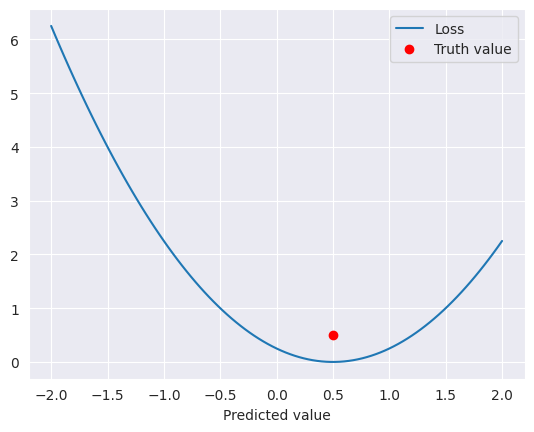

In [48]:
yhat = torch.linspace(-2, 2, 101)
y = torch.tensor(0.5)

loss_fn_mse = nn.MSELoss()
L = np.zeros(yhat.shape)

for i, yy in enumerate(yhat):
    L[i] = loss_fn_mse(yy, y)

print(y, y.shape)
print(yhat, yhat.shape)
print(np.min(L))

plt.plot(yhat, L, label="Loss")
plt.plot(y, y, "ro", label="Truth value")
plt.xlabel("Predicted value")
plt.legend()
plt.show()

## BCE loss function

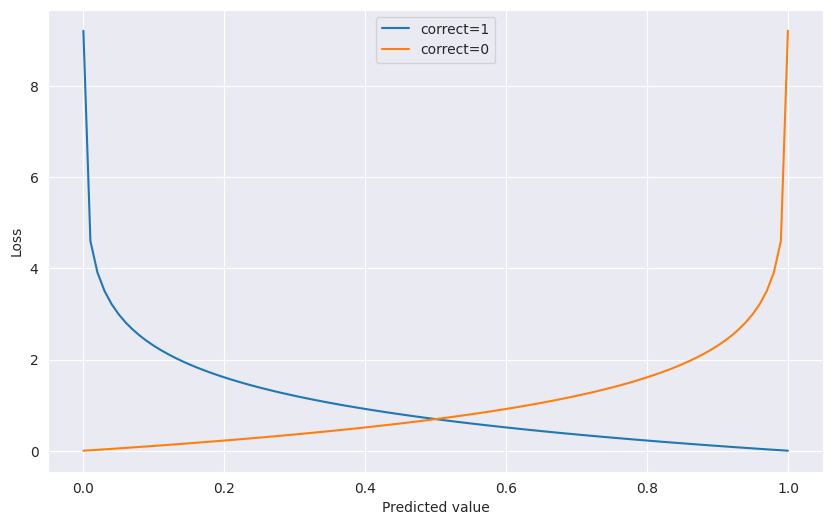

In [49]:
yhat = torch.linspace(0.0001, 0.9999, 101)
y1 = torch.tensor(1, dtype=torch.float)
y2 = torch.tensor(0, dtype=torch.float)

loss_fn_bce = nn.BCELoss()

L = np.zeros((yhat.shape[0], 2))

for i, yy in enumerate(yhat):
    L[i, 0] = loss_fn_bce(yy, y1)
    L[i, 1] = loss_fn_bce(yy, y2)

plt.figure(figsize=(10, 6))
plt.plot(yhat, L)
plt.legend(["correct=1", "correct=0"])
plt.xlabel("Predicted value")
plt.ylabel("Loss")
plt.show()

We will experiment with explicitly calling the sigmoid function and BCELoss separately; and calling the BCEWithLogitsLoss alone

In [50]:
bce = nn.BCELoss()
bce_w_logits = nn.BCEWithLogitsLoss()

yhat = torch.tensor(2, dtype=torch.float)
print(f"Calling sigmoid separately: {bce(nn.functional.sigmoid(yhat), y1)}")
print(f"Calling BCEWithLogitsLoss: {bce_w_logits(yhat, y1)}")

Calling sigmoid separately: 0.12692806124687195
Calling BCEWithLogitsLoss: 0.12692804634571075


## Cross entropy loss

In [51]:
ce_loss = nn.CrossEntropyLoss()
yhat = torch.tensor([[1.0, 4, 3]])

for i in range(3):
    correct_answer = torch.tensor([i])
    loss = ce_loss(yhat, correct_answer)
    print(loss, loss.shape)
    print(f"Loss when correct answer is {i}: {loss}")
    print("=========================================")

tensor(3.3490) torch.Size([])
Loss when correct answer is 0: 3.3490121364593506
tensor(0.3490) torch.Size([])
Loss when correct answer is 1: 0.349012166261673
tensor(1.3490) torch.Size([])
Loss when correct answer is 2: 1.3490121364593506


Cross entropy with softmax activation function

In [52]:
sm = nn.Softmax(dim=1)
yhat_sm = sm(yhat)

for i in range(3):
    correct_answer = torch.tensor([i])
    loss = ce_loss(yhat_sm, correct_answer)
    print(f"Loss when correct answer is {i}: {loss}")

Loss when correct answer is 0: 1.436583399772644
Loss when correct answer is 1: 0.7663178443908691
Loss when correct answer is 2: 1.2122058868408203


Comparing raw, softmax and log-softmax outputs

In [53]:
log_sm = nn.LogSoftmax(dim=1)
yhat_log_sm = log_sm(yhat)

print(yhat)
print(yhat_sm)
print(yhat_log_sm)

tensor([[1., 4., 3.]])
tensor([[0.0351, 0.7054, 0.2595]])
tensor([[-3.3490, -0.3490, -1.3490]])


In [54]:
labels_np = np.hstack((np.zeros((10)), np.ones((10)), 1 + np.ones((10))))
print(labels_np)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


In [55]:
x = np.arange(6).reshape(2, 3)
x

array([[0, 1, 2],
       [3, 4, 5]])

In [56]:
x > 1

array([[False, False,  True],
       [ True,  True,  True]])

In [57]:
x.ndim

2

# Optimizers comparison

In [58]:
a = [np.array([1, 2, 3]), np.array([4, 5, 6])]
b = [np.array([11, 22, 33]), np.array([44, 55, 66])]

print(a[0].shape, a[1].shape)
print(np.hstack((a, b)))

(3,) (3,)
[[ 1  2  3 11 22 33]
 [ 4  5  6 44 55 66]]


(300,) (300,)


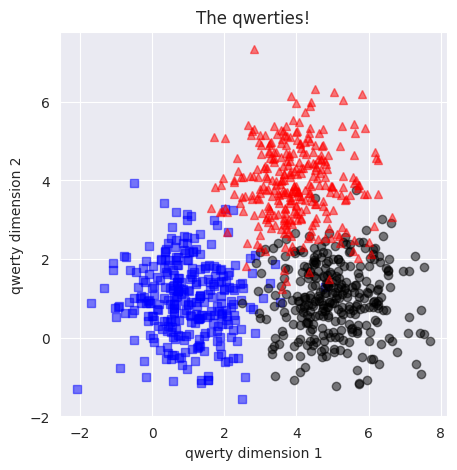

In [59]:
# create data

nPerClust = 300
blur = 1

A = [1, 1]
B = [5, 1]
C = [4, 4]

# generate data
a = [A[0] + np.random.randn(nPerClust) * blur, A[1] + np.random.randn(nPerClust) * blur]
b = [B[0] + np.random.randn(nPerClust) * blur, B[1] + np.random.randn(nPerClust) * blur]
c = [C[0] + np.random.randn(nPerClust) * blur, C[1] + np.random.randn(nPerClust) * blur]
print(a[0].shape, a[1].shape)

# true labels
labels_np = np.hstack(
    (np.zeros((nPerClust)), np.ones((nPerClust)), 1 + np.ones((nPerClust)))
)

# concatanate into a matrix
data_np = np.hstack((a, b, c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).long()  # note: "long" format for CCE

# show the data
fig = plt.figure(figsize=(5, 5))
plt.plot(
    data[np.where(labels == 0)[0], 0],
    data[np.where(labels == 0)[0], 1],
    "bs",
    alpha=0.5,
)
plt.plot(
    data[np.where(labels == 1)[0], 0],
    data[np.where(labels == 1)[0], 1],
    "ko",
    alpha=0.5,
)
plt.plot(
    data[np.where(labels == 2)[0], 0],
    data[np.where(labels == 2)[0], 1],
    "r^",
    alpha=0.5,
)
plt.title("The qwerties!")
plt.xlabel("qwerty dimension 1")
plt.ylabel("qwerty dimension 2")
plt.show()

In [60]:
# use scikitlearn to split the data
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.1
)

# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

# finally, translate into dataloader objects
batchsize = 16
train_loader = DataLoader(
    train_data, batch_size=batchsize, shuffle=True, drop_last=True
)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [61]:
# how many batches are there?
print(f"There are {len(train_loader)} batches, each with {batchsize} samples.")

There are 50 batches, each with 16 samples.


In [62]:
# create a class for the model


def createTheQwertyNet(optimizerAlgo):
    class qwertyNet(nn.Module):
        def __init__(self):
            super().__init__()

            ### input layer
            self.input = nn.Linear(2, 8)

            ### hidden layer
            self.fc1 = nn.Linear(8, 8)

            ### output layer
            self.output = nn.Linear(8, 3)

        # forward pass
        def forward(self, x):
            x = nn.functional.relu(self.input(x))
            x = nn.functional.relu(self.fc1(x))
            return self.output(x)

    # create the model instance
    net = qwertyNet()

    # loss function
    lossfun = nn.CrossEntropyLoss()

    # optimizer
    optifun = getattr(torch.optim, optimizerAlgo)
    optimizer = optifun(net.parameters(), lr=0.01)

    return net, lossfun, optimizer

In [63]:
# test the model with optimizer type as input


# try 'SGD', 'RMSprop', and 'Adam'
optim = createTheQwertyNet("RMSprop")[2]
optim

RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    weight_decay: 0
)

In [64]:
def function2trainTheModel(optimizerType):
    # number of epochs
    numepochs = 50

    # create a new model
    net, lossfun, optimizer = createTheQwertyNet(optimizerType)

    # initialize losses
    losses = torch.zeros(numepochs)
    trainAcc = []
    testAcc = []

    # loop over epochs
    for epochi in range(numepochs):
        # switch on training mode
        net.train()

        # loop over training data batches
        batchAcc = []
        batchLoss = []
        for X, y in train_loader:
            # forward pass and loss
            yHat = net(X)
            loss = lossfun(yHat, y)

            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # loss from this batch
            batchLoss.append(loss.item())

            # compute accuracy
            matches = torch.argmax(yHat, dim=1) == y  # booleans (false/true)
            matchesNumeric = matches.float()  # convert to numbers (0/1)
            accuracyPct = 100 * torch.mean(matchesNumeric)  # average and x100
            batchAcc.append(accuracyPct)  # add to list of accuracies
        # end of batch loop...

        # now that we've trained through the batches, get their average training accuracy
        trainAcc.append(np.mean(batchAcc))

        # and get average losses across the batches
        losses[epochi] = np.mean(batchLoss)

        # test accuracy
        net.eval()
        X, y = next(iter(test_loader))  # extract X,y from test dataloader
        with torch.no_grad():  # deactivates autograd
            yHat = net(X)

        # compare the following really long line of code to the training accuracy lines
        testAcc.append(100 * torch.mean((torch.argmax(yHat, dim=1) == y).float()))
    # end epochs

    # function output
    return trainAcc, testAcc, losses, net

In [65]:
# a function that plots the results


def plotTheResults(optimizerType):
    # compute accuracy over entire dataset (train+test)
    yHat = net(data)
    predictions = torch.argmax(yHat, dim=1)
    accuracy = (predictions == labels).float()
    totalAcc = torch.mean(100 * accuracy).item()

    # and accuracy by group
    accuracyByGroup = np.zeros(3)
    for i in range(3):
        accuracyByGroup[i] = 100 * torch.mean(accuracy[labels == i])

    # create the figure
    fig, ax = plt.subplots(2, 2, figsize=(10, 6))

    # plot the loss function
    ax[0, 0].plot(losses.detach())
    ax[0, 0].set_ylabel("Loss")
    ax[0, 0].set_xlabel("epoch")
    ax[0, 0].set_title(f"{optimizerType}: Losses")

    # plot the accuracy functions
    ax[0, 1].plot(trainAcc, label="Train")
    ax[0, 1].plot(testAcc, label="Test")
    ax[0, 1].set_ylabel("Accuracy (%)")
    ax[0, 1].set_xlabel("Epoch")
    ax[0, 1].set_title(f"{optimizerType}: Accuracy")
    ax[0, 1].legend()

    # plot overall accuracy by group
    ax[1, 0].bar(range(3), accuracyByGroup)
    ax[1, 0].set_ylim([np.min(accuracyByGroup) - 5, np.max(accuracyByGroup) + 5])
    ax[1, 0].set_xticks([0, 1, 2])
    ax[1, 0].set_xlabel("Group")
    ax[1, 0].set_ylabel("Accuracy (%)")
    ax[1, 0].set_title(f"{optimizerType}: Accuracy by group")

    # scatterplot of correct and incorrect labeled data
    colorShapes = ["bs", "ko", "g^"]  # data markers
    for i in range(3):
        # plot all data points
        ax[1, 1].plot(
            data[labels == i, 0],
            data[labels == i, 1],
            colorShapes[i],
            alpha=0.3,
            label=f"Group {i}",
        )

        # cross-out the incorrect ones
        idxErr = (accuracy == 0) & (labels == i)
        ax[1, 1].plot(data[idxErr, 0], data[idxErr, 1], "rx")

    ax[1, 1].set_title(f"{optimizerType}: Total accuracy: {totalAcc:.2f}%")
    ax[1, 1].set_xlabel("qwerty dimension 1")
    ax[1, 1].set_ylabel("qwerty dimension 2")
    ax[1, 1].legend()

    plt.tight_layout()
    plt.show()

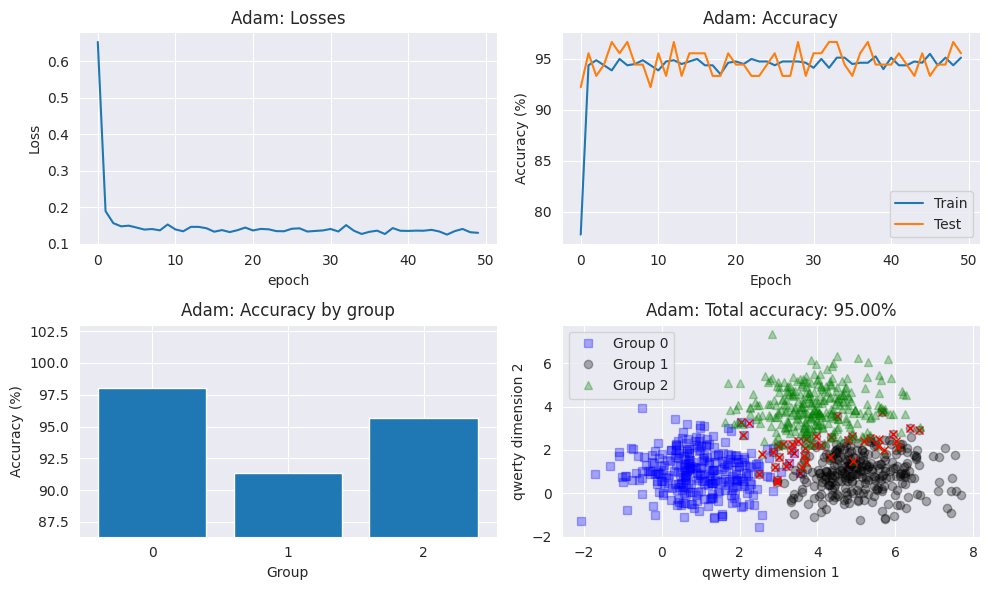

In [66]:
# run the model for one optimizer
optimizerType = "Adam"
trainAcc, testAcc, losses, net = function2trainTheModel(optimizerType)

# visualize!
plotTheResults(optimizerType)

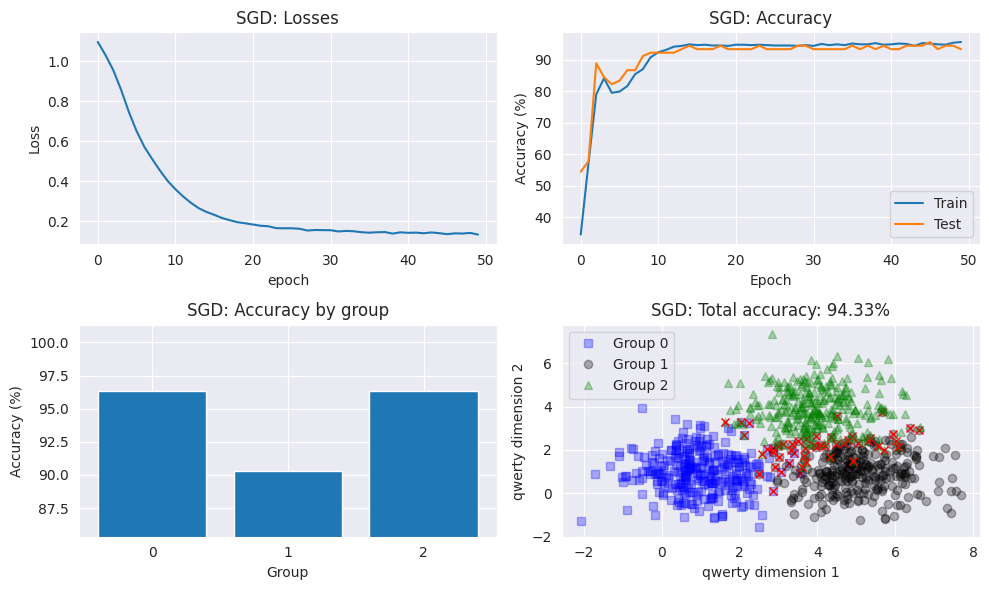

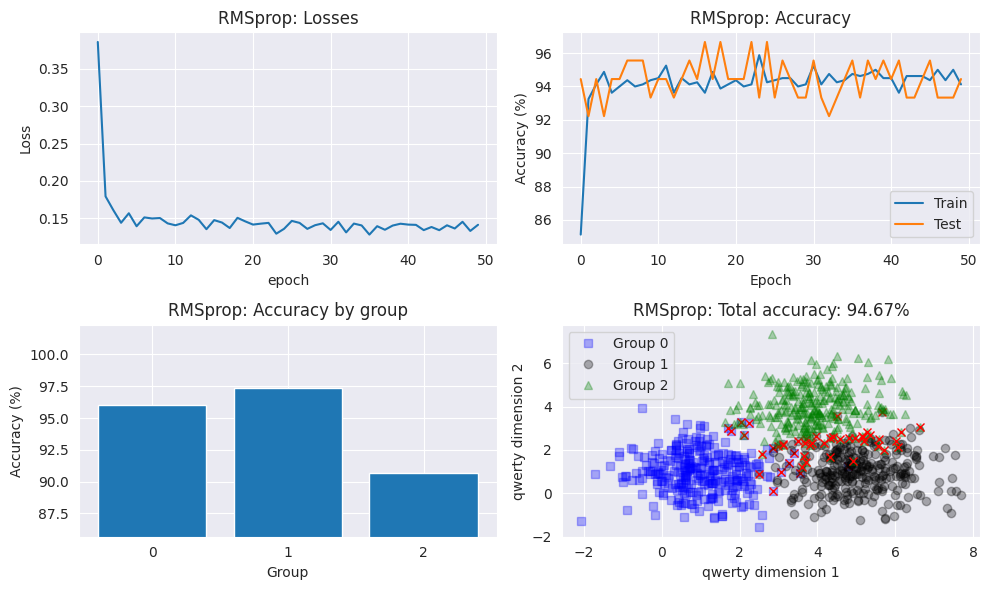

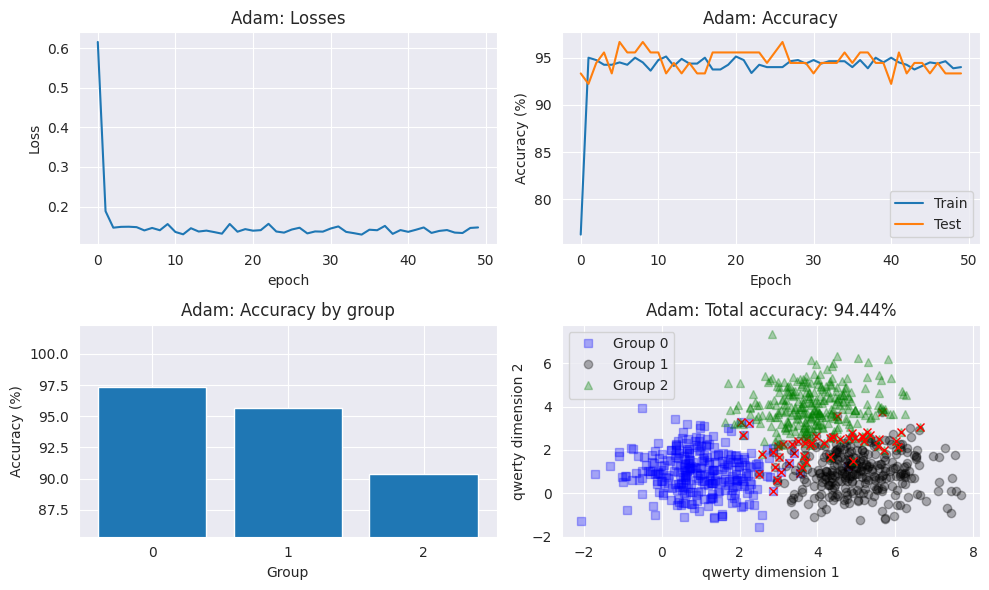

In [67]:
# now run through all of them

# average performance
performance = []

for opto in ["SGD", "RMSprop", "Adam"]:
    trainAcc, testAcc, losses, net = function2trainTheModel(opto)
    plotTheResults(opto)

    # store the final results
    train = np.mean(trainAcc[-10:])
    test = np.mean(testAcc[-10:])

    performance.append(f"{opto}: train {train:.1f}%, test {test:.1f}%")

In [68]:
performance

['SGD: train 95.0%, test 94.1%',
 'RMSprop: train 94.5%, test 94.1%',
 'Adam: train 94.3%, test 93.8%']

# Code Challenge: optimizer with different learning rate
## My code

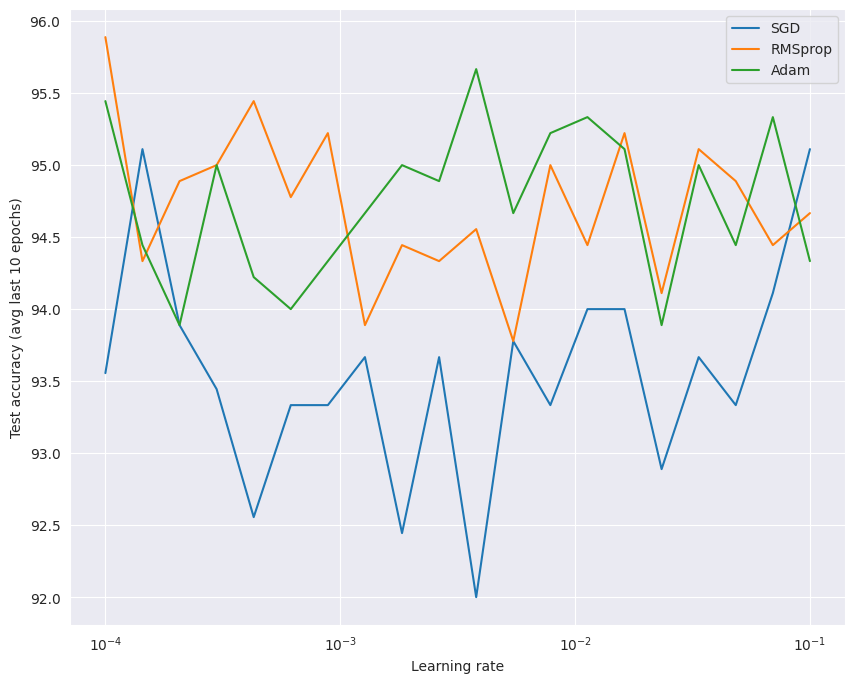

In [76]:
def create_qwerty_net_with_lr(optimizerAlgo, lr):
    class qwertyNet(nn.Module):
        def __init__(self):
            super().__init__()

            ### input layer
            self.input = nn.Linear(2, 8)

            ### hidden layer
            self.fc1 = nn.Linear(8, 8)

            ### output layer
            self.output = nn.Linear(8, 3)

        # forward pass
        def forward(self, x):
            x = nn.functional.relu(self.input(x))
            x = nn.functional.relu(self.fc1(x))
            return self.output(x)

    # create the model instance
    net = qwertyNet()

    # loss function
    lossfun = nn.CrossEntropyLoss()

    # optimizer
    optifun = getattr(torch.optim, optimizerAlgo)
    optimizer = optifun(net.parameters(), lr=0.01)

    return net, lossfun, optimizer


def train_the_model_with_lr(optimizerType, lr):
    # number of epochs
    numepochs = 50

    # create a new model
    net, lossfun, optimizer = create_qwerty_net_with_lr(optimizerType, lr)

    # initialize losses
    losses = torch.zeros(numepochs)
    trainAcc = []
    testAcc = []

    # loop over epochs
    for epochi in range(numepochs):
        # switch on training mode
        net.train()

        # loop over training data batches
        batchAcc = []
        batchLoss = []
        for X, y in train_loader:
            # forward pass and loss
            yHat = net(X)
            loss = lossfun(yHat, y)

            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # loss from this batch
            batchLoss.append(loss.item())

            # compute accuracy
            matches = torch.argmax(yHat, dim=1) == y  # booleans (false/true)
            matchesNumeric = matches.float()  # convert to numbers (0/1)
            accuracyPct = 100 * torch.mean(matchesNumeric)  # average and x100
            batchAcc.append(accuracyPct)  # add to list of accuracies
        # end of batch loop...

        # now that we've trained through the batches, get their average training accuracy
        trainAcc.append(np.mean(batchAcc))

        # and get average losses across the batches
        losses[epochi] = np.mean(batchLoss)

        # test accuracy
        net.eval()
        X, y = next(iter(test_loader))  # extract X,y from test dataloader
        with torch.no_grad():  # deactivates autograd
            yHat = net(X)

        # compare the following really long line of code to the training accuracy lines
        testAcc.append(100 * torch.mean((torch.argmax(yHat, dim=1) == y).float()))
    # end epochs

    # function output
    return trainAcc, testAcc, losses, net


lr_range = np.logspace(-4, -1, 20)
optims = ["SGD", "RMSprop", "Adam"]
test_acc_table = np.zeros((len(lr_range), len(optims)))


for oidx, opto in enumerate(optims):
    for lidx, lr in enumerate(lr_range):
        trainAcc, testAcc, losses, net = train_the_model_with_lr(opto, lr)
        avg_last_10_test_acc = np.mean(testAcc[-10:])
        test_acc_table[lidx, oidx] = avg_last_10_test_acc

plt.figure(figsize=(10, 8))
plt.plot(lr_range, test_acc_table)
plt.legend(optims)
plt.xlabel("Learning rate")
plt.ylabel("Test accuracy (avg last 10 epochs)")
plt.xscale("log")
plt.show()

## Code from teacher

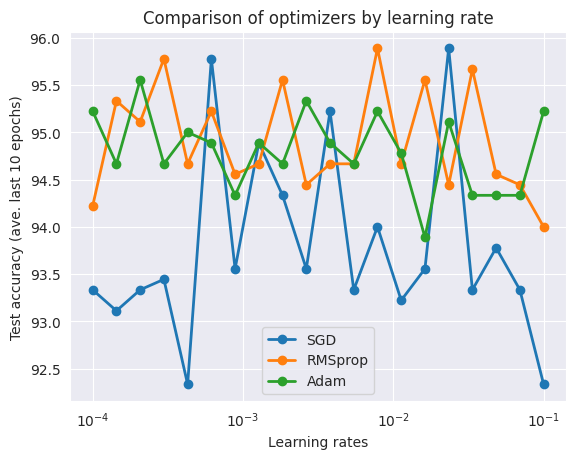

In [77]:
# variables to loop over
learningRates = np.logspace(np.log10(0.0001), np.log10(0.1), 20)
optimTypes = ["SGD", "RMSprop", "Adam"]

# initialize performance matrix
finalPerformance = np.zeros((len(learningRates), len(optimTypes)))


# now for the experiment!
for idx_o, opto in enumerate(optimTypes):
    for idx_l, lr in enumerate(learningRates):
        trainAcc, testAcc, losses, net = train_the_model_with_lr(opto, lr)
        finalPerformance[idx_l, idx_o] = np.mean(testAcc[-10:])

# plot the results!
plt.plot(learningRates, finalPerformance, "o-", linewidth=2)
plt.legend(optimTypes)
plt.xscale("log")
plt.xlabel("Learning rates")
plt.ylabel("Test accuracy (ave. last 10 epochs)")
plt.title("Comparison of optimizers by learning rate")
plt.show()